In [3]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as path_effects
import datetime as dt
import re
import os
import numpy as np
import pandas as pd
import imp
import scipy.special
import scipy.misc
from IPython.display import HTML
from StringIO import StringIO
from zipfile import ZipFile

bt = imp.load_source('baltic', '/Users/evogytis/Documents/BLAB_baltic/baltic.py')

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

def convertDate(x,start,end):
    """ Converts calendar dates between given formats """
    return dt.datetime.strftime(dt.datetime.strptime(x,start),end)

zipfile = ZipFile('./../data/phylo/structured-coalescent.zip')
tree12=bt.loadNexus(zipfile.open('MERS_274_sCoal.combinedTyped.mcc.tree').readlines())

zipfile = ZipFile('./../data/phylo/structured-coalescent-2fragments.zip')
frag1=bt.loadNexus(zipfile.open('structured-coalescent-2fragments/MERS_274_2frag_sCoal.CDS1_1,2.mcc.tree').readlines())
frag2=bt.loadNexus(zipfile.open('structured-coalescent-2fragments/MERS_274_2frag_sCoal.CDS2_1,2.mcc.tree').readlines())

tree12.root.traits['type']='origin'

zipfile=ZipFile('./../data/phylo/sequences.zip')
seqs={}
path_to_alignment='sequences/MERS_CoV_274.fasta'
for line in zipfile.open(path_to_alignment).readlines():
    if '>' in line:
        name=line.strip('\n')[1:]
    else:
        seq=line.strip('\n')
        seqs[name]=seq

path='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=ffffff/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print 'Done!'
HTML(path)

Done!


In [2]:
for n,name in enumerate(sorted(seqs.keys(),key=lambda x:(x.split('|')[2],bt.decimalDate(x.split('|')[-1],variable=True)))):
    #print name
    strain,accession,host,date=name.split('|')
    print '\t %d & %s & %s & %s & %s \\\\' % (n+1,strain.replace('_','\_'),accession,host,date)

	 1 & KSA-378 & KJ713296 & camel & 2013-11 \\
	 2 & KSA-363 & KJ713298 & camel & 2013-11 \\
	 3 & KSA-503 & KJ713297 & camel & 2013-11 \\
	 4 & KSA-376 & KJ713299 & camel & 2013-11 \\
	 5 & KSA-505 & KJ713295 & camel & 2013-11 \\
	 6 & Jeddah-1 & KF917527 & camel & 2013-11-08 \\
	 7 & NRCE-HKU205 & KJ477102 & camel & 2013-11-15 \\
	 8 & KFU-HKU1 & KJ650297 & camel & 2013-11-30 \\
	 9 & KFU-HKU13 & KJ650295 & camel & 2013-12-30 \\
	 10 & Camel\_Egypt\_NRCE-HKU271 &  & camel & 2013-12-30 \\
	 11 & Camel\_Egypt\_NRCE-HKU270 &  & camel & 2013-12-30 \\
	 12 & KFU-HKU19Dam & KJ650296 & camel & 2013-12-30 \\
	 13 & Qatar\_2\_2014 & KJ650098 & camel & 2014-02-16 \\
	 14 & UAE/D469-14 & KU242424 & camel & 2014-03-04 \\
	 15 & UAE/D511-14 & KU242423 & camel & 2014-03-12 \\
	 16 & Jeddah/F13A/2014 & KT368824 & camel & 2014-05 \\
	 17 & UAE/D1164.10/2014 & KP719928 & camel & 2014-06 \\
	 18 & UAE/D1339.2/2014 & KP719931 & camel & 2014-06 \\
	 19 & UAE/D1164.11/2014 & KP719929 & camel & 2014-06 \\


In [3]:
for k in [x for x in tree12.Objects if x.branchType=='node']:
    out=open('./../data/phylo/MERS_clade%s_size%d.fna'%(k.index,len(k.leaves)),'w')

    for s in k.leaves:
        n=tree12.tipMap[s]
        print>>out,'>%s\n%s'%(n,seqs[n])

    out.close()
    
print 'Done!'

Done!


In [4]:
%%bash
path_to_phi='/Users/evogytis/Downloads/PhiPack/Phi'
for filename in /Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade*.fna; do
    path_to_alignment="$filename"
    echo "$path_to_alignment"
    name=${filename##*/}
    base=${name%.fna}
    #echo "${base}_phi.txt"
    rm "./../data/phylo/${base}_phi.txt"
    "$path_to_phi" -f "$path_to_alignment" >>"./../data/phylo/${base}_phi.txt"
done
echo Done!

/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade0_size274.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100240_size17.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100241_size16.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100242_size15.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100243_size13.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100667_size12.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100668_size9.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100669_size8.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100670_size7.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100671_size18.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade101089_size17

In [5]:
%%bash
path_to_3seq='/Users/evogytis/Downloads/3seq_110812/3seq'
for filename in /Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade*.fna; do
    path_to_alignment="$filename"
    echo "$path_to_alignment"
    name=${filename##*/}
    base=${name%.fna}
    #echo "${base}_phi.txt"
    
    rm "/./../data/phylo/${base}_3seq.txt"
    "$path_to_3seq" -single "$path_to_alignment" >> "./../data/phylo/${base}_3seq.txt"
    #Yes | "$path_to_3seq" -fullrun "$path_to_alignment" 8192 >> "/Users/evogytis/Downloads/${base}_3seq.txt"
done
echo Done!

/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade0_size274.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100240_size17.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100241_size16.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100242_size15.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100243_size13.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100667_size12.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100668_size9.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100669_size8.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100670_size7.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade100671_size18.fna
/Users/evogytis/Documents/MERS_2.0/clean/data/alignments/clades/MERS_clade101089_size17


	Need a p-value of 2.457468e-09 to survive multiple comparisons correction

	SI**OUTPUT MUTED**

In [6]:
root='./../data/phylo/'

results_3seq={}
pval_3seq=re.compile('Rejection of the null hypothesis of clonal evolution at p = ([0-9\.e\-]+)')

for filename in os.listdir(root):
    if filename.endswith("_3seq.txt"):
        node_idx=filename.split('_')[1].strip('clade')

        for line in open(root+filename,'r'):
            cerberus=pval_3seq.search(line)
            if cerberus:
                pass
                pval=float(cerberus.group(1))
                
                results_3seq[node_idx]=pval

results_phi={}
pval_phi=re.compile('PHI \(Normal\): +([0-9\-\+\.Ee]+)')
for filename in os.listdir(root):
    if filename.endswith("_phi.txt"):
        node_idx=filename.split('_')[1].strip('clade')

        for line in open(root+filename,'r'):
            cerberus=pval_phi.search(line)
            if cerberus:
                pass
                try:
                    pval=float(cerberus.group(1))
                except ValueError:
                    pval=np.nan
                    
                results_phi[node_idx]=pval
                
                
print results_3seq
print results_phi

{'117774': 1.0, '117773': 1.0, '117772': 1.0, '117771': 1.0, '117770': 1.0, '189058': 0.489005, '16076': 0.809066, '16075': 0.660781, '206799': 1.0, '0': 2.10477e-10, '205285': 1.0, '100667': 1.0, '215286': 1.0, '100669': 1.0, '100668': 1.0, '53005': 1.0, '60130': 1.0, '17554': 0.822021, '184078': 1.0, '59414': 1.0, '68764': 1.0, '53004': 1.0, '172678': 1.0, '149417': 0.0258566, '59412': 1.0, '237684': 1.0, '59413': 1.0, '149419': 0.0163484, '149418': 0.0192056, '101943': 1.0, '101942': 0.999941, '52139': 1.0, '188824': 1.0, '188823': 1.0, '188822': 1.0, '203616': 1.0, '432': 0.999997, '431': 0.999997, '170834': 1.0, '852': 1.0, '100243': 1.0, '100242': 1.0, '100241': 1.0, '100240': 1.0, '6': 0.999951, '88849': 1.0, '128190': 1.0, '29088': 1.0, '29089': 1.0, '29086': 1.0, '29087': 1.0, '181727': 1.0, '181726': 1.0, '181725': 1.0, '5797': 0.997878, '237681': 0.957385, '237682': 0.999995, '237683': 0.997199, '5793': 0.953344, '5792': 1.0, '5791': 0.997878, '5799': 0.953344, '5798': 1.0, 

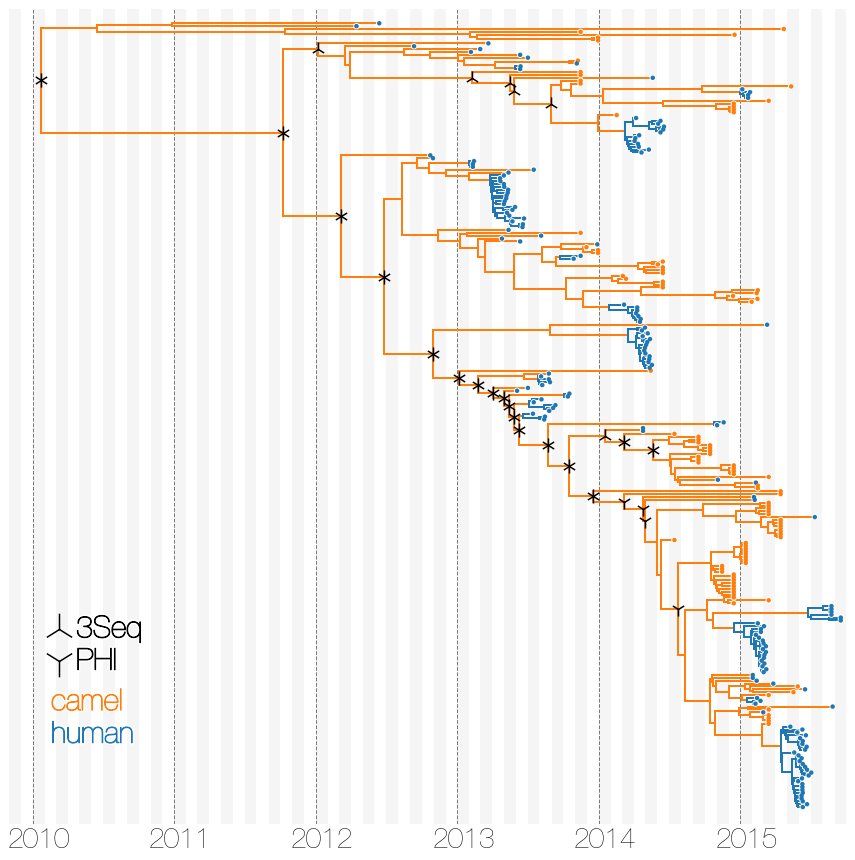

In [7]:
fig,ax = plt.subplots(figsize=(15,15),facecolor='w')

every=12
xDates=['%04d-%02d-01'%(y,m) for y in range(2009,2016) for m in range(1,13)]

[ax.axvspan(bt.decimalDate(xDates[x]),bt.decimalDate(xDates[x])+1/float(12),facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xDates),2)]
ax.set_xticks([bt.decimalDate(x)+1/24.0 for x in xDates if (int(x.split('-')[1])-1)%every==0])

ax.set_xticklabels([convertDate(x,'%Y-%m-%d','%Y') if x.split('-')[1]=='01' else convertDate(x,'%Y-%m-%d','%b') for x in xDates if (int(x.split('-')[1])-1)%every==0])
ax.tick_params(axis='x',labelsize=28,size=0)

[ax.axvline(i,ls='--',lw=1,color='grey',zorder=0) for i in range(2000,2020)]

#genomeTree=bt.loadNexus(subtree_root+'MERS_307.HinfectC.combined.mcc.tree')
order=[k.name for k in tree12.traverse_tree()]

skip=0
branchWidth=2
types=['h','c']

cmap=mpl.cm.Vega10
for t,tp in enumerate(types):
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=1, foreground=cmap(t))] ## black text, white outline
    
    if tp=='h':
        tp='human'
    else:
        tp='camel'
    
    ax.text(0.05,0.1+t/25.0,'%s'%(tp),color=cmap(t),size=30,transform=ax.transAxes,path_effects=effects)
    
ax.scatter(0.06,0.12+(1+t)/25.0,s=1000,color='k',marker='1',transform=ax.transAxes)
ax.scatter(0.06,0.12+(2+t)/25.0,s=1000,color='k',marker='2',transform=ax.transAxes)

effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=1, foreground='k')] ## black text, white outline
ax.text(0.08,0.12+(1+t)/25.0,'PHI',size=30,color='k',ha='left',va='center',transform=ax.transAxes,path_effects=effects)
ax.text(0.08,0.12+(2+t)/25.0,'3Seq',size=30,color='k',ha='left',va='center',transform=ax.transAxes,path_effects=effects)
    
for k in tree12.Objects:
    c='k'
    if isinstance(k.traits['type'],str):
        c=cmap(types.index(k.traits['type']))
    
    z=1
    if k.traits['type']=='h':
        z=2

    x=k.absoluteTime
    y=k.y

    xp=k.parent.absoluteTime
    if xp==0:
        xp=x
    
    if k.branchType=='leaf':
        ax.scatter(x,y,s=20,facecolor=c,edgecolor='none',zorder=4)
        ax.scatter(x,y,s=40,facecolor='w',edgecolor='none',zorder=3)
    else:
        node_idx='%s'%(k.index)
        
        yl=k.children[0].y+skip
        yr=k.children[-1].y+skip
        ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=z)
        
        
        if results_phi.has_key(node_idx):
            if results_phi[node_idx]<=0.05:
                ax.scatter(x,y,s=200,color='k',marker='1',zorder=10)
                
        if results_3seq.has_key(node_idx):
            if results_3seq[node_idx]<=0.05:
                ax.scatter(x,y,s=200,color='k',marker='2',zorder=10)

    if k.parent.traits.has_key('type') and k.traits['type']!=k.parent.traits['type']:
        ax.plot([x,xp],[y,y],color=cmap(1),lw=branchWidth,zorder=z-1)
    else:
        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=z)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(size=0)
#ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_xlim(bt.decimalDate('2009-11-01'),bt.decimalDate('2015-10-01'))
ax.set_ylim(-5,tree12.ySpan+5)
plt.savefig('./../figures/mers_recombination_tree.png',dpi=300,bbox_inches='tight') ## save to file
plt.show()

## Posterior clade sharing

In [6]:
## analyse posteriors
zipfile=ZipFile('./../data/phylo/structured-coalescent.zip')
subtrees_path=['MERS_274_sCoal.combined.subtrees']
tipRe = re.compile("'[A-Za-z0-9\_\|\-\/]+'")

subtree_posteriors={}
N_intros=[]

mcmcCounter=0
human_tips=[]
burnin=0

for run in range(len(subtrees_path)):
    print subtrees_path[run]
    for line in zipfile.open(subtrees_path[run]).readlines():
        l=line.strip().split('\t')
        if len(l)>0 and l[0]!='state' and int(l[0])>burnin:
            subtree_leaves=[tipRe.findall(string) for string in l[1:]]
            
            N_intros.append(len(subtree_leaves))
                
            for leaves in subtree_leaves:
                
                lf=','.join(sorted(leaves))
                for tip in leaves:
                    if tip not in human_tips:
                        human_tips.append(tip)
                if subtree_posteriors.has_key(lf):
                    subtree_posteriors[lf]+=1
                else:
                    subtree_posteriors[lf]=1
                    
            mcmcCounter+=1
            
for clade in subtree_posteriors.keys():
    subtree_posteriors[clade]=subtree_posteriors[clade]/float(mcmcCounter)

MERS_274_sCoal.combined.subtrees


In [13]:
unique_clades=subtree_posteriors.keys()

bestMatch={}
for tip in human_tips: ## iterate over tips
    tipPresence=[subtree for subtree in subtree_posteriors.keys() if tip in subtree.split(',')] ## identify clades which contain the tip
    best=sorted(tipPresence,key=lambda x:-subtree_posteriors[x])[0] ## get the clade with the highest posterior probability
    
#     print tip,best,subtree_posteriors[best]/float(mcmcCounter),[subtree_posteriors[x]/float(mcmcCounter) for x in tipPresence]
    bestMatch[tip]=best ## remember highest probability membership of tip

# human_tips=sorted(human_tips,key=lambda x:-subtree_posteriors[bestMatch[x]]) ## sort tips according to their best membership score
human_tips=sorted(human_tips,key=lambda x:-order.index(x.strip("'"))) ## sort tips according to their order in tree

# human_tips=sorted(human_tips,key=lambda x:-bt.decimalDate(x.strip("'").split('|')[-1],variable=True)) ## sort tips according to their collection date


empty=np.zeros((len(human_tips),len(human_tips)))
empty.fill(np.nan)
analysis=pd.DataFrame(empty,index=human_tips,columns=human_tips)

for tipA in human_tips:
    for tipB in human_tips:
        tipOverlap=[subtree for subtree in unique_clades if tipA in subtree.split(',') and tipB in subtree.split(',')] ## identify clades with both tips
        
        #print [(subtree1_posteriors.has_key(x),subtree2_posteriors.has_key(x)) for x in tipOverlap]
        
        if len(tipOverlap)>0 and human_tips.index(tipA)>=human_tips.index(tipB): ## non-zero clades, lower triangle
            #print tipA,tipB,len(tipOverlap),sum([subtree_posteriors[x]/float(mcmcCounter) for x in tipOverlap])

            if subtree_posteriors.has_key(tipA): ## if tip has been observed on its own
                if tipA==tipB: ## if plotting against itself
                    analysis[tipA][tipB]=subtree_posteriors[tipA] ## report singleton probability, not integrated probability (which will be 1.0)
                else:
                    analysis[tipA][tipB]=sum([subtree_posteriors[x] for x in tipOverlap if subtree_posteriors.has_key(x)]) ## if different report integrated probability
            else:
                analysis[tipA][tipB]=sum([subtree_posteriors[x] for x in tipOverlap if subtree_posteriors.has_key(x)]) ## everything else integrated probability too
        
print 'Done!'
# for subtree in sorted(subtree_posteriors.keys(),key=lambda x:-len(x.split(','))):
#     print subtree_posteriors[subtree]/float(mcmcCounter),subtree

Done!


174


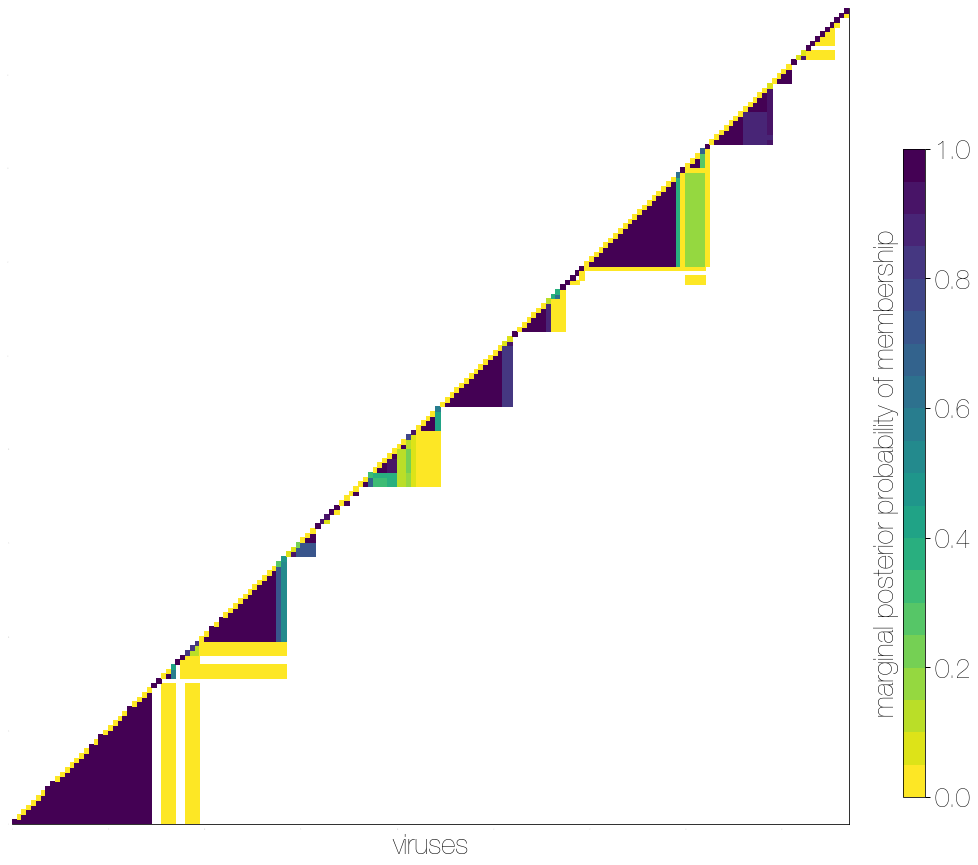

In [14]:
# ## start figure
fig,ax = plt.subplots(figsize=(15,15),facecolor='w')

print len(human_tips)

# ## mask NaNs
masked_array = np.ma.array(np.array(analysis),mask=np.isnan(analysis))

# cmap.set_bad('k',1.)
cmap=mpl.cm.get_cmap('viridis_r',20)
# ## plot heatmap
heatmap = ax.pcolor(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1)

# ## make plot pretty
# ax.set_xticks(np.arange(0.5,len(human_tips)+0.5))
# ax.set_xticklabels([x for x in human_tips],rotation=90)
# ax.set_yticks(np.arange(0.5,len(human_tips)+0.5))
# ax.set_yticklabels(human_tips)
# ax.set_xlabel('destination',size=30)
# ax.set_ylabel('origin',size=30)

ax.tick_params(length=0,labelsize=1)

ax.set_xlabel('viruses',size=28)

ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

axcb = fig.add_axes([0.95, 0.15, 0.02, 0.6], frame_on=False)
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=mpl.colors.Normalize(vmin=0.0,vmax=1.0),orientation='vertical',alpha=1.0)

axcb.yaxis.set_label_position("left")
axcb.tick_params(axis='y',which='both',direction='out',size=5,labelsize=26,width=1,pad=5)

# #ax.text(0.01,0.95,'%s'%break_description,size=26,va='bottom',ha='left',transform=ax.transAxes)
axcb.set_ylabel('marginal posterior probability of membership',{'fontsize':28})

plt.show()

In [11]:
## analyse posteriors of two frag trees
subtree_root='/Users/evogytis/Documents/MERS_2.0/clean/analyses/beast/frag/'

subtrees_path1=['MERS_274_2frag_sCoal.CDS1_1,2.combined.subT.txt'] ## files generated with samogitia.py from 2 fragment trees
subtrees_path2=['MERS_274_2frag_sCoal.CDS2_1,2.combined.subT.txt']

tipRe = re.compile("'([A-Za-z0-9\_\|\-\/]+)'")

subtree_posteriors1={}
subtree_posteriors2={}
N_intros1=[]
N_intros2=[]

mcmcCounter=0
human_tips1=[]
human_tips2=[]

diffs=[]

burnin=0
mcmcCounter=0

for run in range(len(subtrees_path1)):
    print subtrees_path1[run]
    f1=open(subtree_root+subtrees_path1[run],'r')
    f2=open(subtree_root+subtrees_path2[run],'r')
    for line1,line2 in zip(f1,f2):
        l1=line1.strip().split('\t')
        l2=line2.strip().split('\t')
        
        if len(l1)>0 and l1[0]!='state' and int(l1[0])>burnin:
            subtree_leaves1=[tipRe.findall(string) for string in l1[1:]]
            subtree_leaves2=[tipRe.findall(string) for string in l2[1:]]
            
            N_intros1.append(len(subtree_leaves1))
            N_intros2.append(len(subtree_leaves2))
            
            diffs.append(len(subtree_leaves1)-len(subtree_leaves2))
            
            for leaves in subtree_leaves1:
                
                lf=','.join(sorted(leaves))
                for tip in leaves:
                    if tip not in human_tips1:
                        human_tips1.append(tip.strip("'"))
                if subtree_posteriors1.has_key(lf):
                    subtree_posteriors1[lf]+=1
                else:
                    subtree_posteriors1[lf]=1
                    
            for leaves in subtree_leaves2:
                lf=','.join(sorted(leaves))
                for tip in leaves:
                    if tip not in human_tips2:
                        human_tips2.append(tip.strip("'"))
                if subtree_posteriors2.has_key(lf):
                    subtree_posteriors2[lf]+=1
                else:
                    subtree_posteriors2[lf]=1
                    
            mcmcCounter+=1
            
for clade in subtree_posteriors1.keys():
    subtree_posteriors1[clade]=subtree_posteriors1[clade]/float(mcmcCounter)
    
for clade in subtree_posteriors2.keys():
    subtree_posteriors2[clade]=subtree_posteriors2[clade]/float(mcmcCounter)

MERS_274_2frag_sCoal.CDS1_1,2.combined.subT.txt


In [12]:
human_embedding=frag2.reduceTree([k for k in frag2.Objects if k.branchType=='leaf' and 'human' in k.name])

human_embedding.sortBranches(descending=False)
order=[x.name.strip("'") for x in human_embedding.traverse_tree()][::-1]
print len(order)

174


In [13]:
unique_clades=list(set(subtree_posteriors1.keys()+subtree_posteriors2.keys()))

bestMatch1={}
bestMatch2={}
for tip in human_tips1: ## iterate over tips
    tipPresence1=[subtree for subtree in subtree_posteriors1.keys() if tip in subtree.split(',')] ## identify clades which contain the tip
    best1=sorted(tipPresence1,key=lambda x:-subtree_posteriors1[x])[0] ## get the clade with the highest posterior probability
    bestMatch1[tip]=best1 ## remember highest probability membership of tip

for tip in human_tips2:
    tipPresence2=[subtree for subtree in subtree_posteriors2.keys() if tip in subtree.split(',')]
    best2=sorted(tipPresence2,key=lambda x:-subtree_posteriors2[x])[0]
    bestMatch2[tip]=best2

shared_clades=[clade for clade in unique_clades if subtree_posteriors1.has_key(clade) and subtree_posteriors2.has_key(clade)]
shared_tips=sorted([clade for clade in unique_clades if subtree_posteriors1.has_key(clade) and subtree_posteriors2.has_key(clade) and clade.count(',')==0],key=lambda x:order.index(x.strip("'")))

print len(human_tips1),len(human_tips2)

human_tips1=sorted(shared_tips,key=lambda x:-subtree_posteriors2[bestMatch2[x]])+sorted(set(human_tips1)-set(shared_tips),key=lambda x:-subtree_posteriors1[bestMatch1[x]]) ## sort tips according to their best membership score
human_tips2=sorted(shared_tips,key=lambda x:-subtree_posteriors2[bestMatch2[x]])+sorted(set(human_tips2)-set(shared_tips),key=lambda x:-subtree_posteriors2[bestMatch2[x]]) ## sort tips according to their best 

print len(human_tips1),len(human_tips2)

# human_tips=sorted(human_tips,key=lambda x:-bt.decimalDate(x.strip("'").split('|')[-1],variable=True)) ## sort tips according to their collection date

#empty=np.zeros((len(shared_tips),len(shared_tips)))
empty=np.zeros((len(order),len(order)))
empty.fill(np.nan)
#analysis=pd.DataFrame(empty,index=shared_tips,columns=shared_tips)
analysis=pd.DataFrame(empty,index=order,columns=order)

for tipA in shared_tips:
    #tipOverlap1=[subtree for subtree in subtree_posteriors1.keys() if tipA in subtree.split(',')]
    for tipB in shared_tips:
        #tipOverlap=[subtree for subtree in shared_clades if tipA in subtree.split(',') and tipB in subtree.split(',')]
        tipOverlap=[subtree for subtree in unique_clades if tipA in subtree.split(',') and tipB in subtree.split(',')]
        
        
        
#         tipOverlap1=[subtree for subtree in subtree_posteriors1.keys() if tipA in subtree.split(',')]
#         tipOverlap2=[subtree for subtree in subtree_posteriors2.keys() if tipB in subtree.split(',')]
        
#         if len(tipOverlap)>0:
#             if tipA==tipB:
#                 if subtree_posteriors1.has_key(tipA) and subtree_posteriors2.has_key(tipB):
#                     analysis[tipB][tipA]=np.mean([subtree_posteriors1[tipA],subtree_posteriors1[tipB]])
#                 elif subtree_posteriors1.has_key(tipA):
#                     analysis[tipB][tipA]=subtree_posteriors1[tipA]
#                 elif subtree_posteriors2.has_key(tipB):
#                     analysis[tipB][tipA]=subtree_posteriors2[tipB]

#             elif human_tips1.index(tipA)>human_tips2.index(tipB):
#                 analysis[tipB][tipA]=sum([subtree_posteriors1[x] for x in tipOverlap])

#             elif human_tips1.index(tipA)<human_tips2.index(tipB):
#                 analysis[tipB][tipA]=sum([subtree_posteriors2[x] for x in tipOverlap])

        
        if len(tipOverlap)>0:
            if human_tips1.index(tipA)>=human_tips2.index(tipB): ## non-zero clades, lower triangle
            
                if subtree_posteriors1.has_key(tipA): ## if tip has been observed on its own
                    if tipA==tipB: ## if plotting against itself
                        analysis[tipA][tipB]=subtree_posteriors1[tipA]
                    else:
                        analysis[tipA][tipB]=sum([subtree_posteriors1[x] for x in tipOverlap if subtree_posteriors1.has_key(x)])
                else:
                    analysis[tipA][tipB]=sum([subtree_posteriors1[x] for x in tipOverlap if subtree_posteriors1.has_key(x)])
                    
            else:
                if subtree_posteriors2.has_key(tipB): ## if tip has been observed on its own
                    if tipA==tipB: ## if plotting against itself
                        analysis[tipA][tipB]=subtree_posteriors2[tipB]
                    else:
                        analysis[tipA][tipB]=sum([subtree_posteriors2[x] for x in tipOverlap if subtree_posteriors2.has_key(x)])
                else:
                    analysis[tipA][tipB]=sum([subtree_posteriors2[x] for x in tipOverlap if subtree_posteriors2.has_key(x)])

print 'Done!'

174 174
174 174
Done!


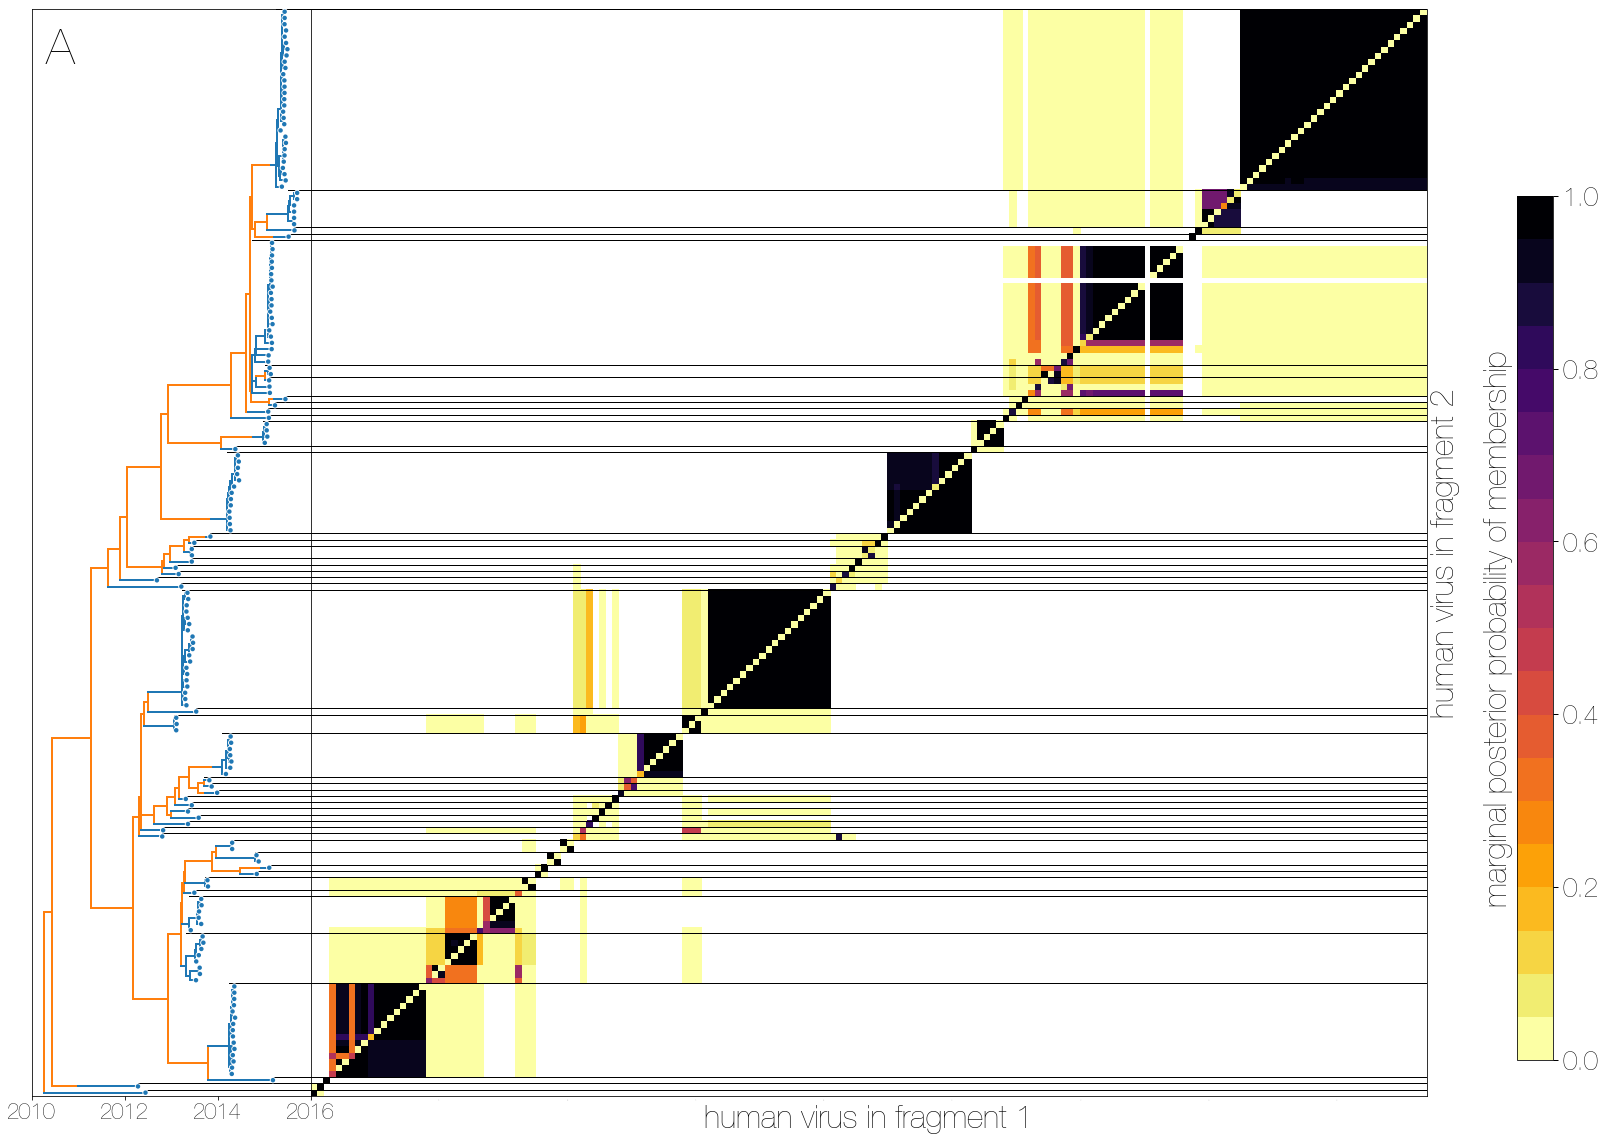

In [14]:
fig = plt.figure(figsize=(25,20),facecolor='w')
gs = gridspec.GridSpec(1, 2,width_ratios=[1,4],hspace=0.15,wspace=0.0)

ax1 = plt.subplot(gs[0]) ## lower plot
ax2 = plt.subplot(gs[1],sharey=ax1)

branchWidth=2

clist=[(0.0,mpl.cm.Vega10(0)),
       (0.5,'grey'),
       (1.0,mpl.cm.Vega10(1))]
cmap = mpl.colors.LinearSegmentedColormap.from_list('mycmap',clist)


for k in human_embedding.Objects:
    c='grey'
    xp=0
    z=1
    if k.traits.has_key('type'):
        if k.traits['type']=='c':
            c=cmap(1.0)
        elif k.traits['type']=='h':
            c=cmap(0.0)
        xp=k.parent.absoluteTime

    
    x=k.absoluteTime
    y=k.y-0.5

    
    if xp==0:
        xp=x

    if k.branchType=='leaf':
        if 'camel' in k.name:
            c=cmap(1.0)
        elif 'human' in k.name:
            c=cmap(0.0)
        ax1.scatter(x,y,s=20,facecolor=c,edgecolor='none',zorder=4)
        ax1.scatter(x,y,s=40,facecolor='w',edgecolor='none',zorder=3)
        #ax1.plot([x,2020.0],[y,y],ls='-',color='k',lw=1)
    else:
        yl=k.children[0].y-0.5
        yr=k.children[-1].y-0.5
        ax1.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=z)
    #c='grey'
    ax1.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=z)

for k in human_embedding.Objects:
    if k.parent.traits.has_key('type') and k.traits['type']!=k.parent.traits['type']:
        if k.branchType=='node':
            lvs=[order.index(frag2.tipMap[x]) for x in k.leaves]

            ax2.axhline(max(lvs)+1,color='k',lw=1)
            ax1.plot([k.absoluteTime,2020.0],[max(lvs)+1,max(lvs)+1],color='k',lw=1)

        elif k.branchType=='leaf':
            ax1.plot([k.absoluteTime,2020.0],[k.y,k.y],color='k',lw=1)
            ax2.axhline(k.y,color='k',lw=1)
    
ax1.set_yticklabels([])
ax1.tick_params(axis='y',size=0)
ax1.set_xlim(2010.0,2016.0)
ax1.set_ylim(0,human_embedding.ySpan)

ax1.text(0.05,0.95,'A',size=50,transform=ax1.transAxes)


ax2.set_ylim(0,human_embedding.ySpan)

# ## mask NaNs
masked_array = np.ma.array(np.array(analysis).T,mask=np.isnan(analysis))


cmap=mpl.cm.get_cmap('inferno_r',20)

# ## plot heatmap
heatmap = ax2.pcolormesh(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1)

ax2.tick_params(length=0,labelsize=1)
ax2.set_xlabel('human virus in fragment 1',size=32)
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('human virus in fragment 2',size=32)

ax2.spines['top'].set_visible(False)

axcb = fig.add_axes([0.95, 0.15, 0.02, 0.6], frame_on=False)
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,norm=mpl.colors.Normalize(vmin=0.0,vmax=1.0),orientation='vertical',alpha=1.0)

axcb.yaxis.set_label_position("left")
axcb.tick_params(axis='y',which='both',direction='out',size=5,labelsize=26,width=1,pad=5)

axcb.set_ylabel('marginal posterior probability of membership',{'fontsize':32})
plt.savefig('./../figures/mers_fragments.png',dpi=150,bbox_inches='tight') 
plt.show()

52.9267164759 46.7589990001 1.63295744917 2.59535051661
Shared clades account for 0.9701 and 0.9474 of all clades in posteriors in frag1 and frag 2, respectively when ignoring clades at less than 1.0 frequency


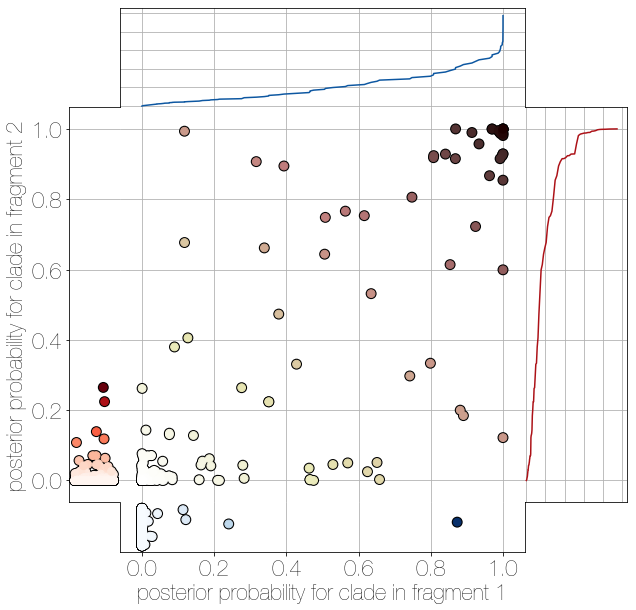

In [19]:
g1=0
g2=0
b1=0
b2=0

olap=[clade for clade in unique_clades if subtree_posteriors1.has_key(clade) and subtree_posteriors2.has_key(clade)]

for o in olap:
    g1+=subtree_posteriors1[o]
    g2+=subtree_posteriors2[o]

cutoff=1.0
for o in subtree_posteriors1.keys():
    if o not in olap and subtree_posteriors1[o]<cutoff:
        #print o
        b1+=subtree_posteriors1[o]

for o in subtree_posteriors2.keys():
    if o not in olap and subtree_posteriors2[o]<cutoff:
        b2+=subtree_posteriors2[o]

print g1,g2,b1,b2
print 'Shared clades account for %.4f and %.4f of all clades in posteriors in frag1 and frag 2, respectively when ignoring clades at less than %s frequency'%(g1/(g1+b1),g2/(g2+b2),cutoff)

fig = plt.figure(figsize=(10,10),facecolor='w')

gs = gridspec.GridSpec(3, 3,width_ratios=[1,8,2],height_ratios=[2,8,1],hspace=0.0,wspace=0.0)

ax = plt.subplot(gs[4]) ## center


left = plt.subplot(gs[3],sharey=ax) ## left
bottom = plt.subplot(gs[7],sharex=ax) ## bottom


cumulative_right=plt.subplot(gs[5],sharey=ax)
cumulative_top=plt.subplot(gs[1],sharex=ax)

s=60

xo=[subtree_posteriors1[o] for o in olap]
yo=[subtree_posteriors2[o] for o in olap]
norm=mpl.colors.Normalize(0,2)
ax.scatter(xo,yo,s=s,c=np.sum((xo,yo),axis=0),cmap=mpl.cm.pink_r,norm=norm,zorder=10)
ax.scatter(xo,yo,s=s*2,facecolor='k',edgecolor='none',zorder=9)



xxu=[subtree_posteriors1[o] for o in subtree_posteriors1.keys() if o not in olap]
xyu=np.random.uniform(size=len(subtree_posteriors1)-len(olap))
bottom.scatter(xxu,xyu,s=s,c=xxu,cmap=mpl.cm.Blues,zorder=10)
bottom.scatter(xxu,xyu,s=s*2,facecolor='k',edgecolor='none',zorder=9)


yxu=np.random.uniform(size=len(subtree_posteriors2)-len(olap))
yyu=[subtree_posteriors2[o] for o in subtree_posteriors2.keys() if o not in olap]
left.scatter(yxu,yyu,s=s,c=yyu,cmap=mpl.cm.Reds,zorder=10)
left.scatter(yxu,yyu,s=s*2,facecolor='k',edgecolor='none',zorder=9)


sxo=sorted(xo)
syo=sorted(yo)
cumulative_right.plot(np.cumsum(syo)/sum(syo+yyu),syo,c=mpl.cm.Reds(0.85))
cumulative_top.plot(sxo,np.cumsum(sxo)/sum(sxo+xxu),c=mpl.cm.Blues(0.85))


ax.grid()
left.grid(axis='y')
bottom.grid(axis='x')
cumulative_top.grid()
cumulative_right.grid()

left.set_ylabel('posterior probability for clade in fragment 2')
bottom.set_xlabel('posterior probability for clade in fragment 1')

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(cumulative_top.get_xticklabels(), visible=False)
plt.setp(cumulative_right.get_yticklabels(), visible=False)

cumulative_top.set_yticks(np.linspace(0,1,6))
cumulative_right.set_xticks(np.linspace(0,1,6))

cumulative_top.set_yticklabels([])
cumulative_right.set_xticklabels([])

#cumulative_right.set_xlabel('cumulative clade probability')

ax.tick_params(size=0)
left.tick_params(axis='x',size=0)
bottom.tick_params(axis='y',size=0)
cumulative_right.tick_params(size=0)
cumulative_top.tick_params(size=0)

left.set_xticklabels([])
bottom.set_yticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
bottom.spines['top'].set_visible(False)
left.spines['right'].set_visible(False)
cumulative_top.spines['bottom'].set_visible(False)
cumulative_right.spines['left'].set_visible(False)

cumulative_top.set_ylim(-0.01,1.05)
cumulative_right.set_xlim(-0.01,1.05)
plt.savefig('./../figures/mers_flower.png',dpi=300,bbox_inches='tight') 
plt.show()

In [17]:
from Bio import SeqIO
from Bio import AlignIO
tree_path='MERS_CoV_274_rename.labelled_tree.newick'
asr_path='MERS_CoV_274_rename.ML_sequence.fasta'
cross_path='MERS_CoV_274_rename.position_cross_reference.txt'
zipfile=ZipFile('./../data/phylo/CFML_results.zip')

for line in zipfile.open(cross_path).readlines():
    l=map(int,line.strip('\n').split(','))
#     site_map={x-1:i for i,x in enumerate(l) if x!=0}
    site_map={i:x-1 for i,x in enumerate(l) if x!=0}
    L=len(l)
print L
alignment = AlignIO.read(zipfile.open(asr_path), "fasta")

seq_map={}
for seq in alignment:
#     seq_map[seq.id]=str(seq.seq)
    seq_map[seq.id]=''.join([seq.seq[site_map[i]] for i in sorted(site_map.keys())])

ll=bt.tree()

for line in zipfile.open(tree_path).readlines():
    l=line.strip('\n')
    bt.make_tree(l,ll)

ll.traverse_tree()
ll.sortBranches()


for k in ll.Objects:
    if isinstance(k,bt.leaf): ## if leaf - add trait
        k.traits['id']=k.numName
    else:
        k.traits['id']=k.traits['label']
    
    
    if k.branchType=='node':
        node_id=k.traits['label']
        k.traits['seq']=seq_map[node_id]
#         k.traits['seq']=''.join([seq_map[node_id][site_map[i]] for i in sorted(site_map.keys())])
    else:
        k.traits['seq']=seq_map[k.numName]
#         k.traits['seq']=''.join([seq_map[k.numName][site_map[i]] for i in sorted(site_map.keys())])
        
#print [k.traits for k in ll.Objects]
for k in ll.Objects:
    if k.traits.has_key('seq') and k.parent.traits.has_key('seq'):
        cur_seq=k.traits['seq']
        anc_seq=k.parent.traits['seq']
        
        k.traits['mu']=['%s_%s%s'%(i,m[0],m[1]) for i,m in enumerate(zip(anc_seq,cur_seq)) if m[0]!=m[1]]

30130


In [21]:
mutations={}

for k in ll.Objects: ## iterate over objects

    if isinstance(k,bt.leaf): ## if leaf - add trait
        k.traits['id']=k.numName
    else:
        k.traits['id']=k.traits['label']


    key=k.traits['id']
    k.traits['mu']=[]

    if k.traits.has_key('id') and k.parent.traits.has_key('id'):
        keyp=k.parent.traits['id']

        for i in range(len(seq_map[key])): 
            #print i
            if seq_map[key][i]!=seq_map[keyp][i]: ## for every difference (i.e. mutation) along a branch
                nucleotide_then=seq_map[keyp][i]
                nucleotide_now=seq_map[key][i]

                mutation=[nucleotide_then,nucleotide_now]
#                 mutation=sorted(mutation)

                mu='%s'%(''.join(mutation))

#                 site=poly_to_actual[i]
                site=i

                full_mu='%s_%s'%(site,mu)

                if mutations.has_key(full_mu):
                    mutations[full_mu]+=1
                else:
                    mutations[full_mu]=1

#                 if mutations[site].has_key(mu):
#                     mutations[site][mu]+=1
#                 else:
#                     mutations[site][mu]=1

#                 k.traits['mu'][site]=mu

                k.traits['mu'].append(full_mu)
ll.drawTree()  
print 'Done!'

Done!


547


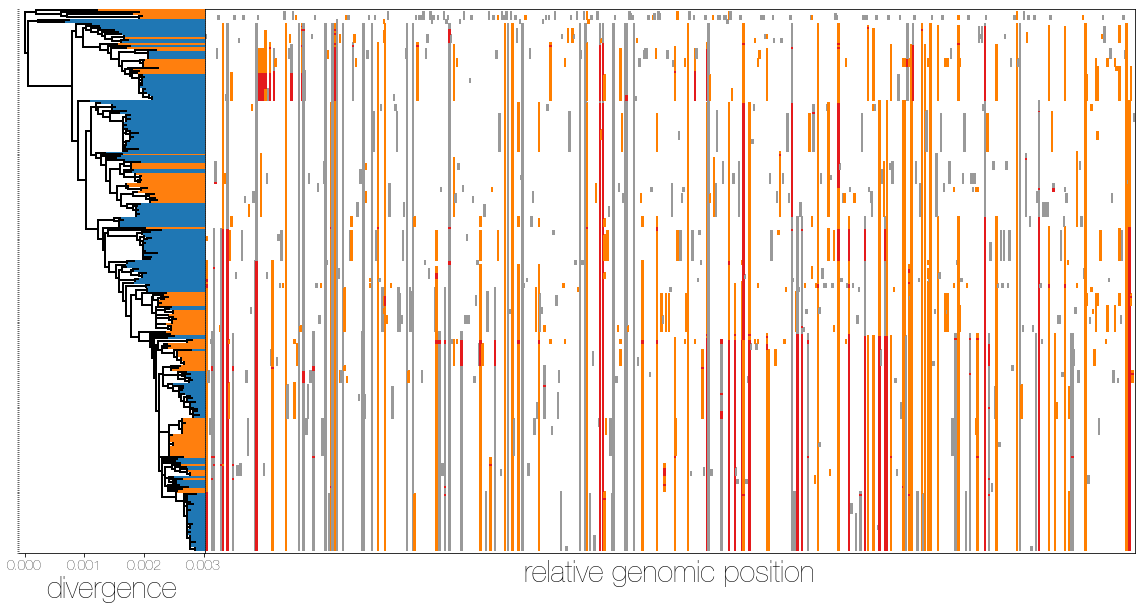

In [22]:
N_tips=len([k for k in ll.Objects if k.branchType=='leaf'])
L_aln=len(seq_map.values()[0])

empty=np.zeros((N_tips,L_aln))
empty.fill(np.nan)
analysis=pd.DataFrame(empty,index=range(N_tips),columns=range(L_aln))


norm=mpl.colors.Normalize(1,len(ll.nodes)+1,clip=False)
perturb=list(np.random.choice(ll.nodes,len(ll.nodes),replace=False))

from matplotlib import colors

cmap=mpl.cm.Set1

valid_nucleotides=['A','C','T','G','U']

# plotTree=ll.collapseNodes('length',lambda x:x<=1e-07)
plotTree=ll
plotTree.sortBranches()
print len(plotTree.Objects)

for k in sorted(plotTree.Objects,key=lambda w:-w.height): ## start from earliest objects

    key=k.traits['id']
    derived_alleles={int(mut.split('_')[0]):mut.split('_')[1] for mut in k.traits['mu']} ## get mutations on branch

    for site in sorted(derived_alleles.keys()): ## iterate over sites changed
        mu='%s_%s'%(site,derived_alleles[site]) ## format mutation

        #all_alleles=[seq_map[seq][site] for seq in seq_map.keys() if 'NODE' not in seq and seq_map[seq][site] in valid_nucleotides] ## get the site in all sequences

        if k.branchType=='node': ## only care for nodes

            leaves=k.leaves
            children=[w for w in plotTree.Objects if w.branchType=='leaf' and w.numName in leaves] ## get every child
            
            children_allele=[seq_map[child][site] for child in leaves if seq_map[child][site] in valid_nucleotides] ## get the site's current state in children
            
            for n in children:
                if seq_map[n.numName][site]==derived_alleles[site][-1] and seq_map[n.numName][site] in valid_nucleotides: ## site same as ancestor
                    if mutations[mu]>1: ## ... but homoplasious
                        analysis[site][n.y]=1
                    else: ## all good, single mutation in ancestor inherited by one descendant
                        analysis[site][n.y]=2
                    
                if seq_map[n.numName][site]!=derived_alleles[site][-1] and seq_map[n.numName][site] in valid_nucleotides: ## site reverted?
                    analysis[site][n.y]=0
                    
fig = plt.figure(figsize=(20,10),facecolor='w')

## define subplots
gs = gridspec.GridSpec(1, 2,width_ratios=[1,5],hspace=0.0,wspace=0.0)

ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0],sharey=ax1)


## mask NaNs
analysis.dropna(axis=1,how='any',thresh=1,inplace=True) ## drop NaNs, singleton mutations mostly
masked_array = np.ma.array(np.array(analysis),mask=np.isnan(analysis))

heatmap = ax1.pcolor(masked_array,edgecolors='none', linewidths=0,cmap=cmap,alpha=1)
# heatmap = ax1.pcolormesh(np.array(analysis),edgecolors='none', linewidths=0,cmap=cmap,norm=norm,alpha=1)

ax1.set_ylim(0,N_tips+1)

ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

branchWidth=2
tipSize=30
for k in plotTree.Objects:
    key=k.traits['id']
    y=k.y+0.5
    #yp=k.parent.y
    b=k.length
    x=k.height
    xp=k.parent.height 
    
    if xp==None or xp==0.0:
        xp=x
    
    c='k'
    if isinstance(k,bt.leaf):
        if 'camel' in k.numName:
            tc=mpl.cm.Vega10(1)
        else:
            tc=mpl.cm.Vega10(0)

        ax2.add_patch(plt.Rectangle((x,y-0.5),1.0,1.0,facecolor=tc,edgecolor='none'))

    elif isinstance(k,bt.node):
        yl=k.children[0].y+0.5
        yr=k.children[-1].y+0.5

        c='k'
        #print k.index,plotTree.nodes.index(k),norm(plotTree.nodes.index(k)),cmap(norm(plotTree.nodes.index(k)))
        ax2.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98) 
        
    ax2.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=98)

ax2.set_xlim(-0.0001,ll.treeHeight+0.0001)


# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_yticklabels([])

ax1.tick_params(size=0)
ax2.tick_params(axis='x',labelsize=14)
ax2.tick_params(axis='y',size=0)

ax1.set_xlabel('relative genomic position',size=30)
ax2.set_xlabel('divergence',size=30)

plt.savefig('./../figures/mers_incompatibilities.png',dpi=300,bbox_inches='tight') 
plt.show()

In [23]:
print analysis.shape

(274, 636)
